In [1]:
import os
import re
import sys

from PIL import Image, ImageFilter
import imageio
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from scipy import ndimage as ndi
from scipy.misc import imresize
from skimage import feature
from skimage.measure import block_reduce
from skimage import color
from scipy.signal import convolve2d as conv2
from sklearn.learning_curve import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn import decomposition
%matplotlib inline

In [3]:
def file_list(start_dir):
    """Generate file list in directory"""
    file_list = []
    for root, dirs, files in os.walk(start_dir):
        for f in files:
            if f[0] != '.':
                file_list.append(f)
    return file_list

def hog_img(img):
    img = np.asarray(img)
    hog_img = grayscale_image(img)
    hogged, hogged_img = feature.hog(hog_img, visualise=True)
    return hogged

def grayscale_image(img):
    return color.rgb2gray(img)

def edge_detect_score(img):
    score = [img for img in [feature.canny(img[:,:,i]) for i in range(3)]]
    score = [item for sublist in score for item in sublist]
    return score

def edge_detect_gray_score(img):
    cols = list(np.sum(feature.canny(grayscale_image(img), sigma=1), axis=1))
    return cols

def img2score(img):
    score = []
    score = hog_img(img)
#     score = edge_detect_score(img)
    return score

def train_scene_detection():
    """Train scene detection classifier"""

    print('Training scene detection classifier')

    X = []
    y = []

    positive_list = file_list('/test_images_button')

In [68]:
def file_list(start_dir):
    """Generate file list in directory"""
    file_list = []
    for root, dirs, files in os.walk(start_dir):
        for f in files:
            if f[0] != '.':
                file_list.append(f)
    return file_list

def hog_img(img):
    img = np.asarray(img)
    hog_img = grayscale_image(img)
    hogged, hogged_img = feature.hog(hog_img, visualise=True)
    return hogged

def grayscale_image(img):
    return color.rgb2gray(img)

def edge_detect_score(img):
    score = [img for img in [feature.canny(img[:,:,i]) for i in range(3)]]
    score = [item for sublist in score for item in sublist]
    return score

def edge_detect_gray_score(img):
    cols = list(np.sum(feature.canny(grayscale_image(img), sigma=1), axis=1))
    return cols

def img2score(img):
    score = []
    score = hog_img(img)
#     score = edge_detect_score(img)
    return score

def train_scene_detection():
    """Train scene detection classifier"""

    print('Training scene detection classifier')

    X = []
    y = []

    positive_list = file_list('/test_images_button')
    negative_list = file_list('./test_images_non-button')

    for f in positive_list:
        im = np.array(Image.open(os.path.join('./test_images_button', f)))
        X.append(img2score(im))

    y = list(np.ones(len(positive_list)))
    print(y)
        
    for f in negative_list:
        im = np.array(Image.open(os.path.join('./test_images_non-button', f)))
        X.append(img2score(im))

    y.extend(list(np.zeros(len(negative_list))))

    print(y)
    
    return y
        
    X = normalize(X)

    pca = decomposition.PCA(n_components=10)
    pca.fit(X)
    X = pca.transform(X)
    df = pd.DataFrame(X)
    
    pd.DataFrame(X, y).to_csv('scramble.csv')
    
    return X

    # Train logistic model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

    model = LogisticRegression().fit(X_train, y_train)
    print(len(X_train))

    predicted = model.predict(X_test)
    probs = model.predict_proba(X_test)

    # Generate evaluation metrics
    print('Accuracy:', metrics.accuracy_score(y_test, predicted))
    print(metrics.roc_auc_score(y_test, probs[:, 1]))
    print('Confusion Matrix:', metrics.confusion_matrix(y_test, predicted))
    print('Classification Report:', metrics.classification_report(y_test, predicted))

    # evaluate the model using 10-fold cross-validation
    scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
    print('10-fold Cross-Validation:', scores.mean())

    print('Plotting learning curve')
    plot_learning_curve(model, 'learning curve', X_train, y_train)
    plt.show()

    return model

In [12]:
print('Training scene detection classifier')

X = []
y = []

positive_list = file_list('./test_images_button')
negative_list = file_list('./test_images_non-button')

for f in positive_list:
    im = np.array(Image.open(os.path.join('./test_images_button', f)))
    X.append(img2score(im))
    y.extend([1])

for f in negative_list:
    im = np.array(Image.open(os.path.join('./test_images_non-button', f)))
    X.append(img2score(im))
    y.extend([0])
    
print(y)

Training scene detection classifier
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [13]:
pd.DataFrame(X, y).to_csv("scramble.csv")

In [69]:
X = np.array(train_scene_detection())

Training scene detection classifier


In [70]:
y = X
y = pd.DataFrame(y)
y[0].value_counts()

0.0    3933
Name: 0, dtype: int64

(3933, 10)
(3933, 10)


KeyError: 'Level network must be same as name (None)'

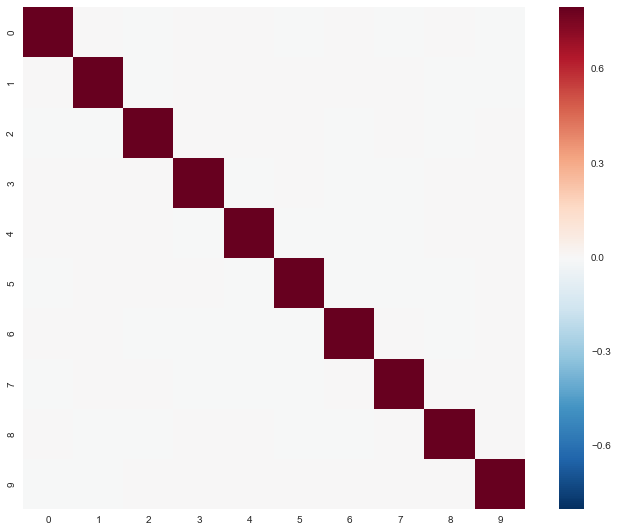

In [55]:
X_copy = X.copy()
print(X_copy.shape)
pca = decomposition.PCA(n_components=10)
pca.fit(X_copy)
X_copy = pca.transform(X_copy)
print(X_copy.shape)

corrmat = pd.DataFrame(X_copy).corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

In [ ]:
def segment(filename, model, codec='ffmpeg', start_pct=0, end_pct=1):
    """Generate timecodes for game and non-game segments"""
    print('Finding timecodes for segments')
    # Get video id
    video_id = re.findall('v\d+', filename)[0]

    # Open file handle
    vid = imageio.get_reader(filename, codec)

    # Get metadata
    meta = vid.get_meta_data()
    fps = int(np.round(meta['fps']))
    nframes = meta['nframes']
    print(nframes)
    print(fps)
    frames = np.arange(0, nframes, 10)

    # Check frames
    timecodes = []
    start_time = 0
    end_time = 0
    for i in frames:
        img = vid.get_data(i)

        # Resize image as necessary
        img = imresize(img, (720, 1280))
        # imageio.imwrite('./test_images_old_vids/frame_old_{}.png'.format(i), img)

        # Shop button
        h, w, c = img.shape
        x1 = int(w * .94) + np.random.random_integers(-2, 2)
        # x1 = w - 116
        x2 = x1 + 76
        y1 = int(h * .814) + np.random.random_integers(-2, 2)
        # y1 = h - 201
        y2 = y1 + 26
        # print(w, x1, x2)
        # print(h, y1, y2)
        shop = img[y1:y2, x1:x2, :]
        # imageio.imwrite('./test_images_non-button/shop2_{}.png'.format(i), shop)

        threshold = 0.5
        prediction = model.predict(np.array(img2score(shop)).reshape(1, -1))
        if prediction > 0.1 and prediction < 0.9:
            print(prediction, i)

        if prediction >= threshold:
            if not start_time:
                start_time = '{}'.format(i)
                # imageio.imwrite('./test_images/shop_start_{}.png'.format(i), shop)
                # imageio.imwrite('./test_images/full_start_{}.png'.format(i), img)
        if prediction <= threshold and start_time:
            end_time = '{}'.format(i)
            timecodes.append(','.join([start_time, end_time]))
            print([start_time, end_time])
            start_time = 0
            end_time = 0
            # imageio.imwrite('./test_images/shop_end_{}.png'.format(i), shop)
            # imageio.imwrite('./test_images/full_end_{}.png'.format(i), img)

    vid.close()

    return timecodes

# Process arguments from command line
try:
    start_pct = float(sys.argv[1])
    end_pct = float(sys.argv[2])
except:
    print('No range arguments. Processing 100% of video.')
    start_pct = 0
    end_pct = 1

# filename = './video/dota2ti_v83196893_720p30.mp4'
filename = '/Volumes/Passport/LiveBeat/video/dota2ti_v82878048_720p30.mp4'
# filename = '/Volumes/Passport/LiveBeat/video/dota2ti_v29880976_720p30.mp4'
# filename = '/Volumes/Passport/LiveBeat/video/dota2ti_v83196893_720p30_game.mp4'
# filename = '/Volumes/Passport/LiveBeat/video/dota2ti_v83012529_720p30_nongame_2.mp4'

timecodes = segment(filename, train_scene_detection(), 'ffmpeg', start_pct, end_pct)
print('Done. Now writing timecodes.')

# Get video id
video_id = re.findall('v\d+', filename)[0]

timecode_file = './timecodes/timecodes_{}_s{}_e{}.csv'.format(video_id, start_pct, end_pct)
with open(timecode_file, 'w') as f:
    for v in timecodes:
        f.write(v)
        f.write('\n')